In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

from numpy.random import seed
seed(123)


2.2.0
2.3.0-tf


In [2]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd drive/My\ Drive

/content/drive/My Drive


# Zad
Porównaj wyniki działań różnych optymalizacji


In [4]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape

(30162, 41)


(15060, 41)

# SGD

In [6]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_sgd = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [0]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

In [8]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_sgd])

Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 58us/step - loss: 0.5327 - accuracy: 0.7517 - val_loss: 0.4264 - val_accuracy: 0.7808
Epoch 2/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3604 - accuracy: 0.8292 - val_loss: 0.3446 - val_accuracy: 0.8350
Epoch 3/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3392 - accuracy: 0.8394 - val_loss: 0.3351 - val_accuracy: 0.8435
Epoch 4/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.3335 - accuracy: 0.8436 - val_loss: 0.3337 - val_accuracy: 0.8427
Epoch 5/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3305 - accuracy: 0.8438 - val_loss: 0.3290 - val_accuracy: 0.8461
Epoch 6/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.3289 - accuracy: 0.8460 - val_loss: 0.3285 - val_accuracy: 0.8475
Epoch 7/100
30162/30162 [==============================] - 1s 

In [0]:
history_sgd.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

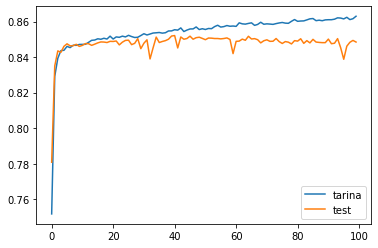

In [9]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

# Zad

Użyjmy LearningRateScheduler

In [10]:
from keras.callbacks import LearningRateScheduler
# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

history_lr_1 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

# sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",optimizer="SGD", metrics=["accuracy"])

lrate = LearningRateScheduler(step_decay)
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[lrate, history_lr_1])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 52us/step - loss: 0.5659 - accuracy: 0.7494 - val_loss: 0.5546 - val_accuracy: 0.7543
Epoch 2/100
30162/30162 [===========================

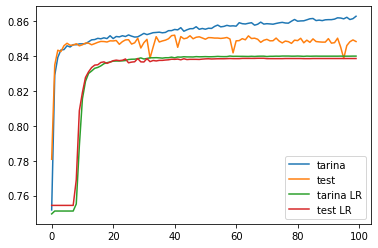

In [12]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")

plt.plot(history_lr_1.history['accuracy'], label = "tarina LR")
plt.plot(history_lr_1.history['val_accuracy'], label = "test LR")
plt.legend()
plt.show()

# Zad

Wykonaj analogiczne zadanie dla 
* Adam bez LearningRateScheduler i learning_rate=0.001
* Adam z użyciem LearningRateScheduler i learning_rate=0.001
* Adam z użyciem LearningRateScheduler i learning_rate=0.0001

Zwizualizuj wyniki:

* porównaj krzywe uczenia

# Adam

In [15]:
from keras.optimizers import Adam
adam = Adam(learning_rate=0.001)
model.compile(loss="binary_crossentropy",optimizer=adam, metrics=["accuracy"])
adam_001_no_learning_rate_scheduler = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100)

Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 56us/step - loss: 0.3373 - accuracy: 0.8435 - val_loss: 0.3367 - val_accuracy: 0.8447
Epoch 2/100
30162/30162 [==============================] - 2s 53us/step - loss: 0.3305 - accuracy: 0.8449 - val_loss: 0.3282 - val_accuracy: 0.8472
Epoch 3/100
30162/30162 [==============================] - 2s 53us/step - loss: 0.3269 - accuracy: 0.8463 - val_loss: 0.3355 - val_accuracy: 0.8392
Epoch 4/100
30162/30162 [==============================] - 2s 53us/step - loss: 0.3246 - accuracy: 0.8481 - val_loss: 0.3259 - val_accuracy: 0.8475
Epoch 5/100
30162/30162 [==============================] - 2s 53us/step - loss: 0.3227 - accuracy: 0.8469 - val_loss: 0.3249 - val_accuracy: 0.8470
Epoch 6/100
30162/30162 [==============================] - 2s 54us/step - loss: 0.3215 - accuracy: 0.8481 - val_loss: 0.3227 - val_accuracy: 0.8489
Epoch 7/100
30162/30162 [==============================] - 2s 

In [16]:
adam = Adam(learning_rate=0.001)
model.compile(loss="binary_crossentropy",optimizer=adam, metrics=["accuracy"])
adam_001_learning_rate = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[lrate])

Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 58us/step - loss: 0.2982 - accuracy: 0.8620 - val_loss: 0.3331 - val_accuracy: 0.8479
Epoch 2/100
30162/30162 [==============================] - 2s 53us/step - loss: 0.2936 - accuracy: 0.8614 - val_loss: 0.3392 - val_accuracy: 0.8481
Epoch 3/100
30162/30162 [==============================] - 2s 54us/step - loss: 0.2913 - accuracy: 0.8608 - val_loss: 0.3424 - val_accuracy: 0.8479
Epoch 4/100
30162/30162 [==============================] - 2s 54us/step - loss: 0.2896 - accuracy: 0.8635 - val_loss: 0.3351 - val_accuracy: 0.8373
Epoch 5/100
30162/30162 [==============================] - 2s 55us/step - loss: 0.2861 - accuracy: 0.8650 - val_loss: 0.3336 - val_accuracy: 0.8501
Epoch 6/100
30162/30162 [==============================] - 2s 55us/step - loss: 0.2843 - accuracy: 0.8663 - val_loss: 0.3386 - val_accuracy: 0.8483
Epoch 7/100
30162/30162 [==============================] - 2s 

In [17]:
adam = Adam(learning_rate=0.0001)
model.compile(loss="binary_crossentropy",optimizer=adam, metrics=["accuracy"])
adam_0001_learning_rate = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[lrate])

Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 58us/step - loss: 0.2474 - accuracy: 0.8829 - val_loss: 0.4101 - val_accuracy: 0.8390
Epoch 2/100
30162/30162 [==============================] - 2s 54us/step - loss: 0.2469 - accuracy: 0.8812 - val_loss: 0.4046 - val_accuracy: 0.8450
Epoch 3/100
30162/30162 [==============================] - 2s 54us/step - loss: 0.2498 - accuracy: 0.8810 - val_loss: 0.3814 - val_accuracy: 0.8384
Epoch 4/100
30162/30162 [==============================] - 2s 54us/step - loss: 0.2470 - accuracy: 0.8798 - val_loss: 0.3911 - val_accuracy: 0.8416
Epoch 5/100
30162/30162 [==============================] - 2s 54us/step - loss: 0.2488 - accuracy: 0.8806 - val_loss: 0.3883 - val_accuracy: 0.8392
Epoch 6/100
30162/30162 [==============================] - 2s 54us/step - loss: 0.2483 - accuracy: 0.8800 - val_loss: 0.3795 - val_accuracy: 0.8432
Epoch 7/100
30162/30162 [==============================] - 2s 

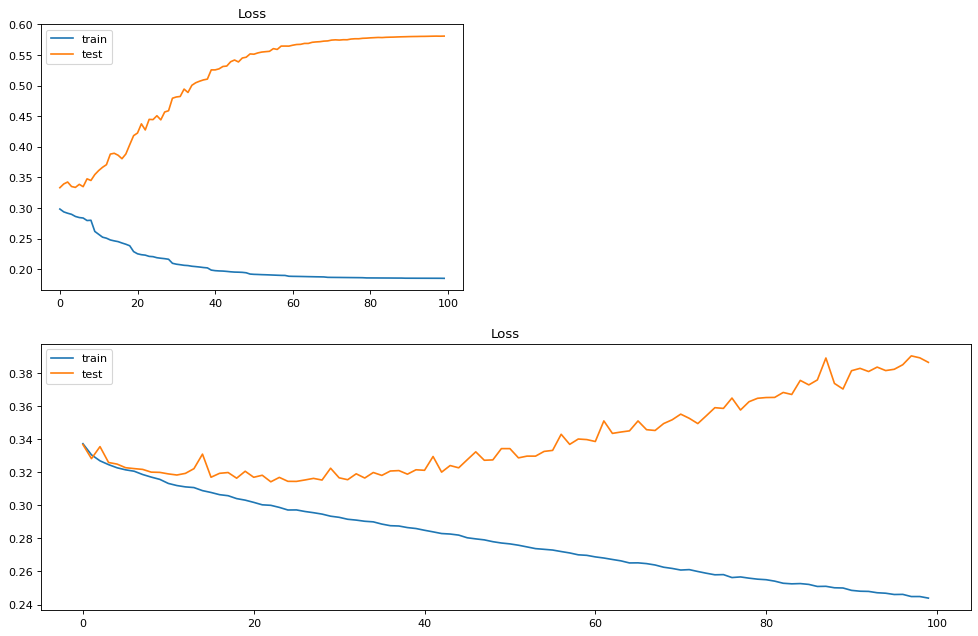

In [35]:
from matplotlib import pyplot
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
pyplot.subplot(311)
pyplot.title('Accuracy')
pyplot.plot(adam_001_no_learning_rate_scheduler.history['accuracy'], label='train')
pyplot.plot(adam_001_no_learning_rate_scheduler.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.subplot(312)
pyplot.title('Loss')
pyplot.plot(adam_001_no_learning_rate_scheduler.history['loss'], label='train')
pyplot.plot(adam_001_no_learning_rate_scheduler.history['val_loss'], label='test')
pyplot.legend()

pyplot.subplot(321)
pyplot.title('Loss')
pyplot.plot(adam_001_no_learning_rate_scheduler.history['loss'], label='train')
pyplot.plot(adam_001_no_learning_rate_scheduler.history['val_loss'], label='test')
pyplot.legend()



pyplot.show()

In [0]:
def get_axs(a, b, history_model, variable, title):
    axs[a, b].set_title(title + "_" + variable.upper())
    axs[a, b].plot(history_model.history['val_' + variable], label='train')
    axs[a, b].plot(history_model.history[variable], label='validate')
    axs[a, b].legend()

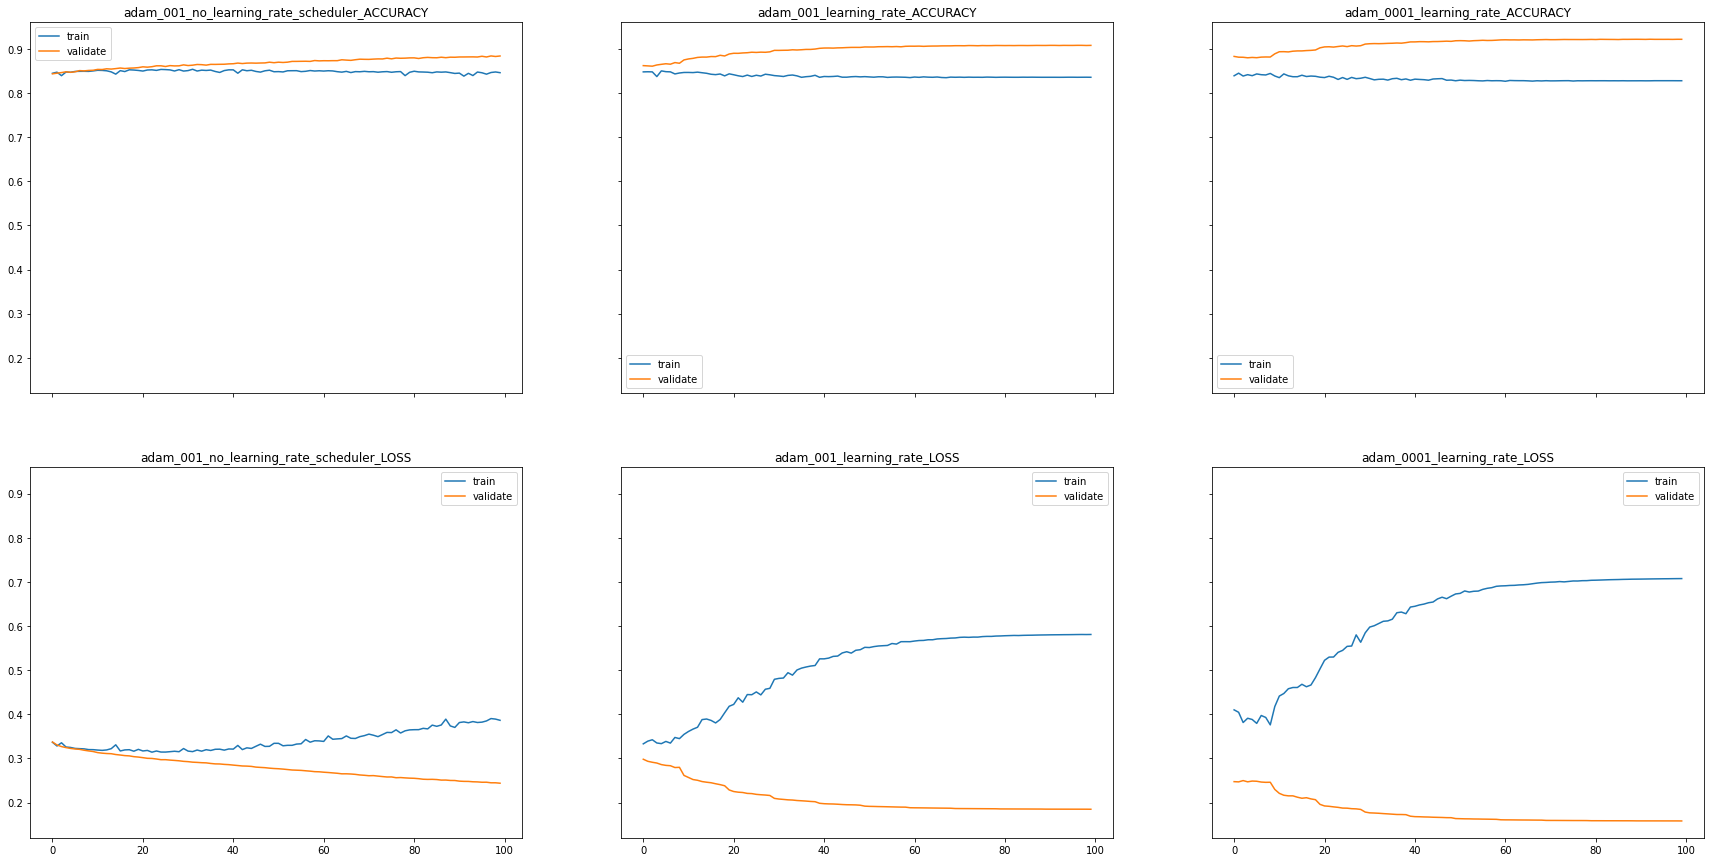

In [65]:
fig, axs = plt.subplots(2, 3,sharex=True, sharey=True, squeeze=False,figsize=(30,15))

get_axs(0, 0, adam_001_no_learning_rate_scheduler, 'accuracy', 'adam_001_no_learning_rate_scheduler')
get_axs(1, 0, adam_001_no_learning_rate_scheduler, 'loss', 'adam_001_no_learning_rate_scheduler')
get_axs(0, 1, adam_001_learning_rate, 'accuracy', 'adam_001_learning_rate')
get_axs(1, 1, adam_001_learning_rate, 'loss', 'adam_001_learning_rate')
get_axs(0, 2, adam_0001_learning_rate, 'accuracy', 'adam_0001_learning_rate')
get_axs(1, 2, adam_0001_learning_rate, 'loss', 'adam_0001_learning_rate')